ChEn-3170: Computational Methods in Chemical Engineering Spring 2023 UMass Lowell; Prof. V. F. de Almeida **21Apr23**

# Laboratory Work 07 (23Apr23)
$
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\zvec}{\boldsymbol{\mathsf{z}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\onevec}{\boldsymbol{\mathsf{1}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\abs}{abs}
  \DeclareMathOperator{\sym}{sym}
$

### Name: `your name`

### Rubric for each assignment: 

|      Context       |  Points |
|:----------------------------|:-------:|
| Precision of the answer     |  80%    |
| Answer Markdown readability |  10%    |
| Code readability            |  10%    |
    

### <font color="red">Guidance:</font>

+  <font color="red"> 
    Save your work frequently to a file locally to your computer.
   </font>
+  <font color="red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<font color="red">, to verify your notebook runs correctly.
   </font>
+  <font color="red">
    Save your file again.
   </font>
+  <font color="red">
    Upload the notebook file in the Blackboard submission portal as: 
   </font> 
   
   **lastname-firstname-labwork-xx.ipynb**
   
   NB: Please note lowercase.

---
### Table of Assignments<a id="toa"></a>
* [Assignment 1 (50 pts)](#a1) Cooled CSTR $T_c=290 K$.
 - [1.1)](#a11)(10 pts) Reaction mechanism.
 - [1.2)](#a12)(10 pts) Steady state.
 - [1.3)](#a13)(10 pts) Energy balance.
 - [1.4)](#a14)(10 pts) Cooling cost at SS.
 - [1.5)](#a15)(Bonus 5 pts) Stability of the SS.
 - [1.6)](#a16)(Bonus 5 pts) Principal relaxation times of the SS.
 - [1.7)](#a17)(5 pts) Evolve the reactor with initial condition equal to SS.
 - [1.8)](#a18)(5 pts) Perturb the SS and evolve the reactor.
* [Assignment 2 (50 pts)](#a2) Cooled CSTR $T_c=340 K$.
 - [2.1)](#a21)(10 pts) Steady state.
 - [2.2)](#a22)(10 pts) Energy balance.
 - [2.3)](#a23)(10 pts) Cooling cost at SS.
 - [2.4)](#a24)(Bonus 5 pts) Stability of the SS.
 - [2.5)](#a25)(Bonus 5 pts) Principal relaxation times of the SS.
 - [2.6)](#a26)(10 pts) Evolve the reactor with initial condition equal to SS.
 - [2.7)](#a27)(10 pts) Perturb the SS and evolve the reactor.
* [Assignment 3 (Bonus 5 pts)](#a3) Unclear poimts.
---

## [<span style="color:blue">Assignment 1 (45 pts)</span>](#toa)<a id="a1"></a>

### <span style="color:blue"> Consider the reactor given in [Notebook 19](https://nbviewer.org/github/dpploy/chen-3170/blob/master/notebooks/19-cstr-cooling-coil.ipynb) with the data given in tabular form below.</span>

|  |
|:---:|
| <img width="300" src="images/cstr2.png" title="Plant Layout"> |
| <p style="text-align:center;"><b>Continuously Stirred Tank Reactor w/ Heat Exchanger</b></p> |

## <span style="color:blue"> Reaction Mechanism Data</span><a id="data"></a>

| Reaction | $\Delta H_\text{R}$ [J/mol] | $k_0$  [1/min] | $\frac{E}{R}$ [K] |
|:-----------------------:|:------------:|:--------------:|:------:|
|A       -> B + C         | -5  $10^4$   | 7.2 $10^{10}$  |  8750  |
|2 B     -> D + E         | 3.9 $10^3$   | 1.2 $10^8$     |  5400  |
|B + 3 C -> F + 2 G       | -1.6 $10^3$  | 4.6 $10^7$     |  3900  |
|A + G   -> 2 D  + C      | 5.6 $10^2$   | 1.9 $10^9$     |  4120  |
|2 E + G -> 1.5 D + 0.5 C | 7.1 $10^1$   | 8.2 $10^{11}$  |  2308  |
|F + 2 G -> B + 3 C       | 1.6 $10^3$   | 4.6 $10^6$     |  4500  |

## <span style="color:blue"> Parameter Data</span><a id="data"></a>

|Name                        | Parameter          | Value                | Unit             |
|:--------------------------:|:------------------:|:--------------------:|:----------------:| 
|volumetric flow rate        | $q$                | 100                  | L/min            |  
|inflow molarity of A        | $c_{\text{A}_\text{in}}$     | 1                    | mol/L            | 
|inflow molarity of all others   | $c_{j_\text{in}}$  | 0                    | mol/L            | 
|inflow temperature          | $T_\text{in}$      | 350                  | K                |
|holdup volume               | $V$                | 100                  | L                | 
|mass density                | $\rho$             | 1000                 | g/L              |
|heat capacity               | $C$                | 0.239                | J/(g K)          |
|coolant heat transfer coeff.| $UA$               | 5 $10^{4}$           | J/(min K)        |

In [11]:
'''Parameters'''
import numpy as np

params = dict()

params['q_flow']          =   100.0  # L/min
params['c_A_in']          =   1.0    # mol/L
params['temp_in']         =   350.0  # K
params['volume']          =   100.0  # L
params['rho']             =   1000.0 # g/L
params['heat_capacity']   =   0.239  # J/g/K
params['u_a']             =   5.0e4  # J/min/K

params['enthalpy_rxn_vec'] = np.array([- 5.0e4, 3.9e3, -1.6e3, 5.6e2, 7.1e1, 1.6e3])  # J/mol
params['k_0_vec']          = np.array([7.2e10, 1.2e8, 4.6e7, 1.9e9, 8.2e11, 4.6e6]) # 1/min
params['energy_a_over_r_vec']  = np.array([8750.0, 5400, 3900, 4120, 2308, 4500]) # K

params['tau'] = params['volume']/params['q_flow']

## <span style="color:blue"> State Data</span><a id="data"></a>

None given yet

In [12]:
'''State'''
import numpy as np

state = dict()

### <span style="color:blue">[1.1)](#toa)(10 pts) Build the reaction mechanism, print and plot the stoichiometric matrix as shown, print the shape, list of species, and compute the rank of the matrix (using your own algorithm). Is the matrix full rank? What can you say about mass conservation? Explain.</span><a id="a11"></a>

[[-1.   1.   1.5  0.   0.   0.   0. ]
 [ 0.  -2.   0.   1.   0.5  0.   0. ]
 [ 0.  -1.  -3.   0.   0.   1.   2. ]
 [-1.5  0.   1.   2.   0.   0.  -1. ]
 [ 0.   0.   0.5  1.5 -2.   0.  -1. ]
 [ 0.   1.   3.   0.   0.  -1.  -2. ]]
r0 :  A -> B + 1.5 C
r1 :  2 B -> D + 0.5 E
r2 :  B + 3 C -> F + 2 G
r3 :  1.5 A + G -> 2 D + C
r4 :  2 E + G -> 1.5 D + 0.5 C
r5 :  2 G + F -> B + 3 C
n_reactions = 6
matrix shape = (6, 7)


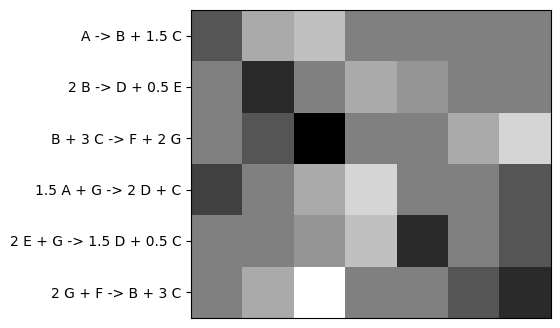

In [14]:
'''Code'''

<span style="color:blue">**Explanation:**</span>

### <span style="color:blue">[1.2)](#toa)(10 pts) Compute the steady state without time integration when the temperature of the coolant is $T_c=290$ K. List the species name and concentration in the form below:</span><a id="a12"></a>

     species name   [mol/L]
         ?         9.472e-01
         ?         6.898e-02
         ?         3.582e-02
         ?         1.277e-02
         ?         2.064e-03
         ?         1.108e-03
         ?         1.049e-06
### <span style="color:blue">Make sure to display the temperature of the reactor at SS.</span>

In [ ]:
'''Code'''

### <span style="color:blue">[1.3)](#toa)(10 pts) Compute the SS coil cooling power, the SS chemical heating power, and demonstrate that total energy is conserved. Explain.</span><a id="a13"></a>

In [19]:
'''Code'''

Heating power = -18.83 kW


<span style="color:blue">**Explanation:** </span>

### <span style="color:blue">[1.4)](#toa)(10 pts) If the cost of electricity is US $0.30/kWh how much does it cost to cool the reactor per hour?</span><a id="a14"></a>

In [20]:
'''Code'''

Cost per hour = US $5.65


### <span style="color:blue">[1.5)](#toa)(Bonus 5 pts) Is the steady state stable with respect to small perturbations? Explain.</span><a id="a15"></a>

In [21]:
'''Code'''

[-1.0, -3935.501, -3.007, -2.152, -1.628, -1.083, -1.083, -1.0]


<span style="color:blue">**Explanation:** </span>

### <span style="color:blue">[1.6](#toa)(Bonus 5 pts) Provide the principal relaxation times of the perturbations of the reactor measured in units of the flow residence time.</span><a id="a16"></a>

In [22]:
'''Code'''

[1.0, 0.0, 0.333, 0.465, 0.614, 0.923, 0.923, 1.0]


<span style="color:blue">**Explanation:** </span>

### <span style="color:blue">[1.7)](#toa)(5 pts) Evolve the CSTR with initial conditions equal to the steady state and show the time evolution. Explain the plot.</span><a id="a17"></a>

In [24]:
'''Code'''

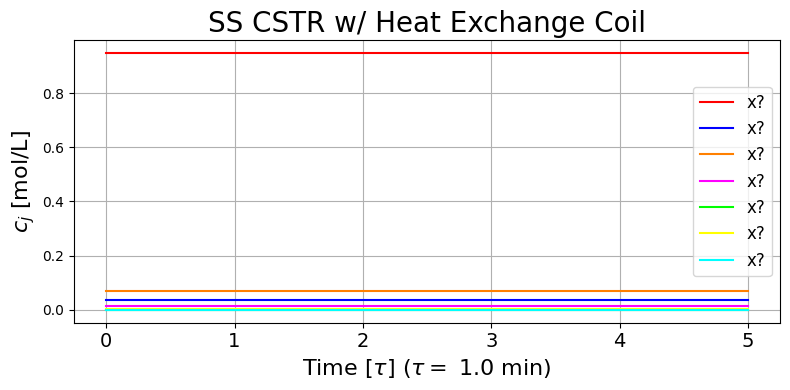

<span style="color:blue">**Explanation:** </span>

### <span style="color:blue">[1.8)](#toa)(5 pts) "Perturb" the steady state of the reactor arbitrarily (make a perturbation +5% of the steady state values) and evolve the reactor in time. Explain the reactor's behavior make the plots below.</span><a id="a18"></a>

In [28]:
'''Code'''

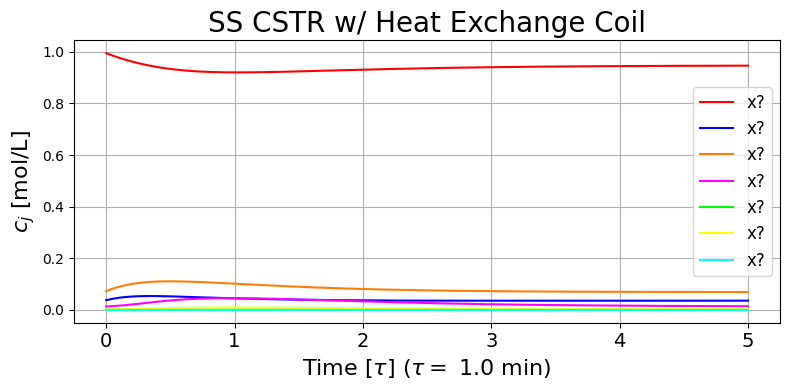

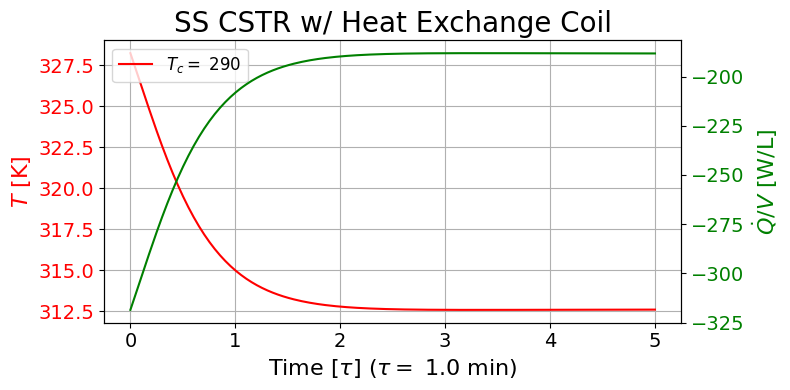

<span style="color:blue">**Explanation:** </span>

## [<span style="color:blue">Assignment 2 (50 pts)</span>](#toa)<a id="a2"></a>

### <span style="color:blue">[2.1)](#toa)(10 pts) Compute the steady state without time integration when the temperature of the coolant is $T_c=340$ K. List the species name and concentration in the form below:</span><a id="a21"></a>

     species name   [mol/L]
        ?          8.365e-01
        ?          2.059e-01
        ?          2.042e-01
        ?          1.212e-01
        ?          2.435e-02
        ?          4.412e-04
        ?          9.745e-05
### <span style="color:blue">Make sure to display the temperature of the reactor at SS.</span>

In [ ]:
'''Code'''

### <span style="color:blue">[2.2)](#toa)(10 pts) Compute the SS coil cooling power, the SS chemical heating power, and demonstrate that total energy is conserved. Explain.</span><a id="a22"></a>

In [34]:
'''Code'''

Heating power = -18.25 kW


<span style="color:blue">**Explanation:** </span>

### <span style="color:blue">[2.3)](#toa)(10 pts) If the cost of electricity is US $0.30/kWh how much does it cost to cool the reactor per hour? Explain why it is cheaper than 1.4)?</span><a id="a23"></a>

In [35]:
'''Code'''

Cost per hour = US $5.47


<span style="color:blue">**Explanation:** </span>

### <span style="color:blue">[2.4)](#toa)(Bonus 5 pts) Is the steady state stable with respect to small perturbations? Explain.</span><a id="a24"></a>

In [36]:
'''Code'''

[-1.0, -943.575, -236.309, -5.705, -5.705, -6.127, -2.077, -1.0]


### <span style="color:blue">[2.5)](#toa)(Bonus 5 pts) Provide the principal relaxation times of the perturbations of the reactor measured in units of the flow residence time.</span><a id="a25"></a>

In [37]:
'''Code'''

[1.0, 0.001, 0.004, 0.175, 0.175, 0.163, 0.481, 1.0]


### <span style="color:blue">[2.6)](#toa)(10 pts) Evolve the CSTR with initial conditions equal to the steady state and show the time evolution. Explain the plot.</span><a id="a26"></a>

In [38]:
'''Code'''

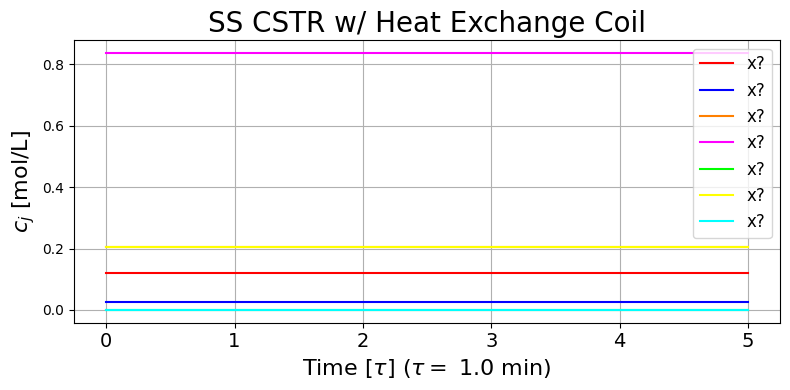

<span style="color:blue">**Explanation:** </span>

### <span style="color:blue">[2.7)](#toa)(10 pts) ""Perturb" the steady state of the reactor arbitrarily (make a perturbation +5% of the steady state values) and evolve the reactor in time. Explain the reactor's behavior make the plots below.</span><a id="a27"></a>

In [40]:
'''Code'''

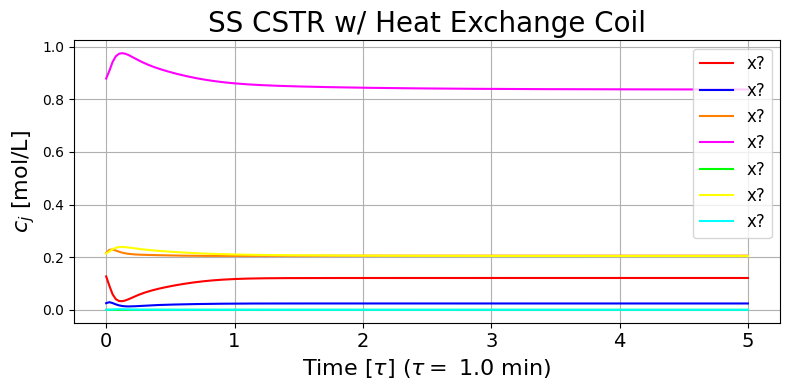

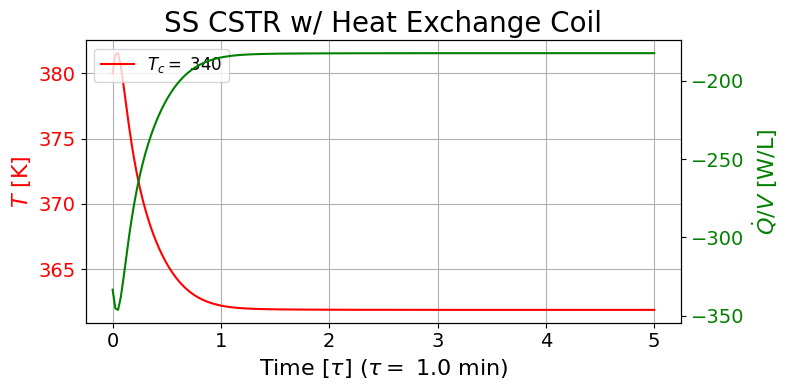

## [<font color="blue">Assignment 3 (Bonus 5 pts)</font>](#toa)<a id="a3"></a>

### <font color="blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</font>

**Description and troubleshooting:**